<a href="https://colab.research.google.com/github/mmandal-scageon/ML-Workshop/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes Dataset
1. Find the dataset shape
2. Find the dataset summary

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

print("Dataset Shape:", data.shape)
print("\nFirst 5 patients:")
print(data.head())

print("\nDataset Summary:")
print(data.describe())

Dataset Shape: (768, 9)

First 5 patients:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.36

# Check for diabetes distribution




In [ ]:
print(f"\nDiabetes Cases: {data['Outcome'].sum()}")
print(f"Non-Diabetes Cases: {len(data) - data['Outcome'].sum()}")
print(f"Diabetes Rate: {data['Outcome'].mean():.1%}")


Diabetes Cases: 268
Non-Diabetes Cases: 500
Diabetes Rate: 34.9%


# Data preparation and separate features (X) and target (y)



In [ ]:
X = data.drop('Outcome', axis=1)  # All features except outcome
y = data['Outcome']  # Just the diabetes diagnosis

print("Features (X):")
print(X.columns.tolist())
print(f"\nTarget (y): Diabetes diagnosis (0=No, 1=Yes)")

Features (X):
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Target (y): Diabetes diagnosis (0=No, 1=Yes)


# Split data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} patients")
print(f"Testing set: {X_test.shape[0]} patients")


Training set: 614 patients
Testing set: 154 patients


# Train the Logistic Regression Model

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Make predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of diabetes
print(y_pred_proba)

[0.62625491 0.10442099 0.26868851 0.28965821 0.00402096 0.18887828
 0.46131612 0.92923192 0.10080565 0.78402276 0.29852    0.63013435
 0.12561887 0.09472973 0.30322767 0.34619176 0.71068944 0.0910382
 0.79391092 0.22606792 0.16106556 0.63788831 0.18016707 0.93613002
 0.52272217 0.01684202 0.58745682 0.05528723 0.3280609  0.03979444
 0.04727105 0.05060697 0.47269135 0.55835082 0.85957356 0.13226997
 0.32204252 0.07247511 0.74920331 0.58268983 0.30005196 0.09320166
 0.09569493 0.29256584 0.1577116  0.40645681 0.17197611 0.1165707
 0.58719965 0.52130206 0.6452038  0.8218838  0.37412862 0.07439599
 0.52075504 0.34144511 0.78002354 0.23550432 0.75586897 0.14305825
 0.78385627 0.2148752  0.00601236 0.87731382 0.04073741 0.14495944
 0.93889933 0.02113361 0.28009971 0.65515362 0.19303869 0.09644637
 0.33039155 0.48641241 0.04126888 0.41158344 0.0706902  0.3983903
 0.13232434 0.07123659 0.07368391 0.32764718 0.06405372 0.24723185
 0.12318875 0.1420884  0.402823   0.38447108 0.05565676 0.2384999

# Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f} ({accuracy:.1%})")

Model Accuracy: 0.714 (71.4%)


# Detailed performance report

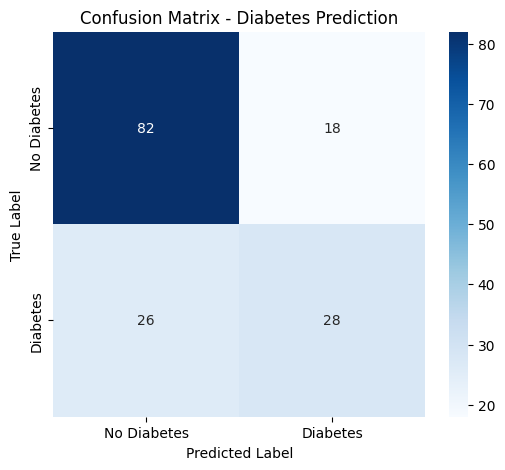

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class labels (0 = No Diabetes, 1 = Diabetes)
labels = ['No Diabetes', 'Diabetes']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Diabetes Prediction')
plt.show()

# Interpret the Model - Clinical Insights

In [ ]:
feature_names = X.columns
coefficients = model.coef_[0]
print(coefficients)

[ 0.11641774  0.03778725 -0.01050816  0.00451845 -0.00133967  0.0908494
  0.84942127  0.01414143]


# Create a DataFrame for better visualization


In [ ]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Impact': ['Higher risk' if c > 0 else 'Lower risk' for c in coefficients]
})

# Sort by absolute importance


In [ ]:
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("Clinical Risk Factors (Ranked by Importance):")
print(coef_df[['Feature', 'Coefficient', 'Impact']])


Clinical Risk Factors (Ranked by Importance):
                    Feature  Coefficient       Impact
6  DiabetesPedigreeFunction     0.849421  Higher risk
0               Pregnancies     0.116418  Higher risk
5                       BMI     0.090849  Higher risk
1                   Glucose     0.037787  Higher risk
7                       Age     0.014141  Higher risk
2             BloodPressure    -0.010508   Lower risk
3             SkinThickness     0.004518  Higher risk
4                   Insulin    -0.001340   Lower risk


# Visualize feature importance



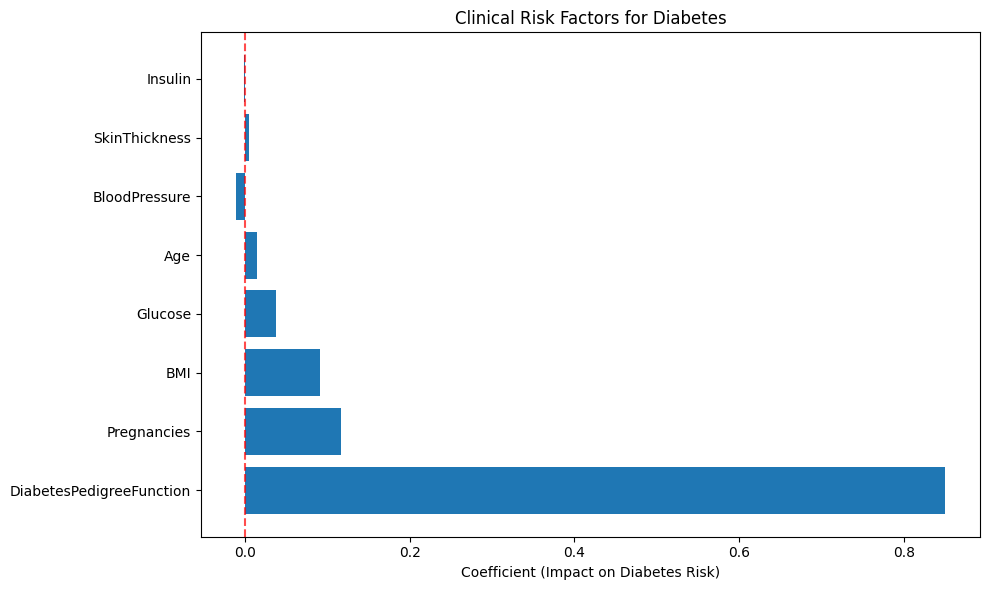

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Clinical Risk Factors for Diabetes')
plt.xlabel('Coefficient (Impact on Diabetes Risk)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ROC Curve - Clinical Decision Making

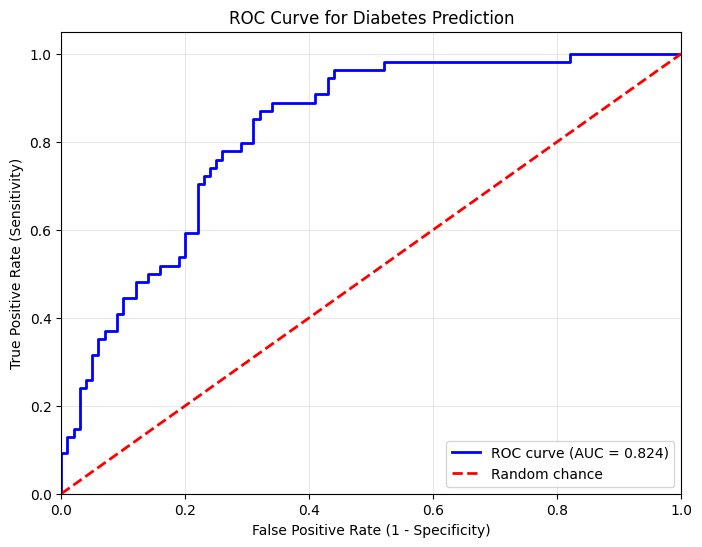

Area Under Curve (AUC): 0.824
Interpretation:
- AUC > 0.8: Excellent
- AUC 0.7-0.8: Good
- AUC 0.6-0.7: Fair
- AUC < 0.6: Poor


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--',
         label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Area Under Curve (AUC): {roc_auc:.3f}")
print("Interpretation:")
print("- AUC > 0.8: Excellent")
print("- AUC 0.7-0.8: Good")
print("- AUC 0.6-0.7: Fair")
print("- AUC < 0.6: Poor")

# Threshold Optimization for Clinical Use
# Different thresholds for different clinical priorities

In [ ]:
def evaluate_threshold(threshold, y_true, y_proba):
    y_pred_thresh = (y_proba >= threshold).astype(int)
    from sklearn.metrics import confusion_matrix, precision_score, recall_score

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresh).ravel()

    sensitivity = tp / (tp + fn)  # True positive rate
    specificity = tn / (tn + fp)  # True negative rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    return {
        'threshold': threshold,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn
    }

# Test different thresholds

In [ ]:
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for thresh in thresholds_to_test:
    result = evaluate_threshold(thresh, y_test, y_pred_proba)
    results.append(result)

# Display results


In [ ]:
print("Threshold Optimization for Clinical Decision Making:")
print("Threshold | Sensitivity | Specificity | Precision | TP | TN | FP | FN")
print("-" * 70)
for r in results:
    print(f"{r['threshold']:^9.1f} | {r['sensitivity']:^11.3f} | {r['specificity']:^11.3f} | "
          f"{r['precision']:^9.3f} | {r['tp']:^2d} | {r['tn']:^2d} | {r['fp']:^2d} | {r['fn']:^2d}")

print("\nClinical Interpretation:")
print("• Lower threshold (0.3): Higher sensitivity - catches more diabetes cases")
print("• Higher threshold (0.7): Higher specificity - fewer false alarms")
print("• Choose based on clinical priority: screening vs confirmation")

Threshold Optimization for Clinical Decision Making:
Threshold | Sensitivity | Specificity | Precision | TP | TN | FP | FN
----------------------------------------------------------------------
   0.3    |    0.796    |    0.700    |   0.589   | 43 | 70 | 30 | 11
   0.4    |    0.648    |    0.780    |   0.614   | 35 | 78 | 22 | 19
   0.5    |    0.519    |    0.820    |   0.609   | 28 | 82 | 18 | 26
   0.6    |    0.444    |    0.880    |   0.667   | 24 | 88 | 12 | 30
   0.7    |    0.370    |    0.920    |   0.714   | 20 | 92 | 8  | 34

Clinical Interpretation:
• Lower threshold (0.3): Higher sensitivity - catches more diabetes cases
• Higher threshold (0.7): Higher specificity - fewer false alarms
• Choose based on clinical priority: screening vs confirmation


Exercise Tasks (Students Do This):
1. Run the code step by step
2. Interpret the coefficients: Which factors increase diabetes risk?
3. Analyze the ROC curve: How good is our model?
4. Choose optimal threshold: For diabetes screening, should we prioritize sensitivity or specificity?
5. Make a clinical recommendation: Based on results, what would you tell a patient?


